# Modelo de Rozenberg 5.6
11-09-22

### Librerias
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

### Parametros iniciales
***

<img src="Modelo de Rozenberg 01.jpg">

In [2]:
NB = 80                        #Tamaño de la zona de contactos central
NR = 10                        #Tamaño de la zona de contactos derecha
NL = 10                        #Tamaño de la zona de contactos izquierda
N = NB+NL+NR                   #Cantidad de bines
n = list(range(0,N))           #Variable Contador

Vind=1000/100                  #Exp de referencia --> Vmax=1000 / N=100
Vmax= Vind*N
#Sind=1200/100                  #Exp de referencia --> s=1200 / N=100
#s   = Sind*N 

#Vmax = 1000                    
s = 1200                       #Cantidad de time steps t que componen un ciclo de tension unitario

n_ciclos = 10                  #Cantidad de ciclos que componen el experimento
tau= n_ciclos*s                #Tiempo total del experimento

#VBAL= 16                       #Parametros - movilidad de vacancias en extremo izquierdo
#VBAR= 16                       #Parametros - movilidad de vacancias en extremo derecho
VBB = 16                       #Parametros - movilidad de vacancias en la zona central
k3 = 1                         # k3 = VBAL/VBB
k4 = 1                         # k4 = VBAL/VBAR
VBAL = k3*VBB
VBAR = k3*VBB/k4

k1= 1000                      # k1 = AL/AB
k2= 1                         # k2 = AL/AR
AB = 1                        #Resistividad local zona central
AL = k1*AB                    #Resistividad local extremo izquierdo
AR = k1*AB/k2                 #Resistividad local extremo derecho
#AL = 1000
#AR = 1000


d_inicial = 0.0001             #Densidad inicial de vacancias

pol = 1                        #Polaridad de la corriente --> pol = 1 Primer ciclo positivo
                                                            #pol = -1 Primer ciclo negativo

In [3]:
Parametros = pd.DataFrame([[N,NR,NL,Vmax,s,n_ciclos, VBAL, VBAR, VBB, AL, AR, AB, d_inicial,pol]],
                          columns=['N','NR','NL','Vmax','s','n_ciclos', 'VBAL', 'VBAR', 'VBB', 'AL', 'AR', 'AB', 'd_inicial', 'pol'])
Parametros.to_csv('00_Parametros.csv',decimal=',', sep= ";", index=False, 
                  header=['N','NR','NL','Vmax','s','n_ciclos', 'VBAL', 'VBAR', 'VBB', 'AL', 'AR', 'AB', 'd_inicial','pol'])

### Potencial aplicado
***
0 → Vmax → 0 → -Vmax

* **_Vmax_**               : Voltaje maximo
* **_V0 =_** _Vmax*0.016_  : constante adimensional  
* **_s_**                  : tiempo que dura cada ciclo unitario
* **_n_ciclos_**           : numero de ciclos totales
* **_tau= n_ciclos * s_**  : tiempo total del experimento

En cada paso temporal del experimento t (1<= t <=tau) se aplica un voltaje externo V(t)  
La corriente del sistema es I(t)= V(t)/rhotot

In [4]:
#Ciclo de tension unitario
k = Vmax / (s/4)              #Pendiente de la rampa

t_ciclo_unitario = list(range(0,s))
V_unitario       = list(range(0,s))

for t in t_ciclo_unitario:
    if (0 <= t <s/4):
        V_unitario[t]= pol*(k*t)
    if (s/4 <= t <=s*3/4):
        V_unitario[t]= pol*(2*Vmax-k*t)
    if (s*3/4 < t <=s):
        V_unitario[t]= pol*(-4*Vmax+k*t)

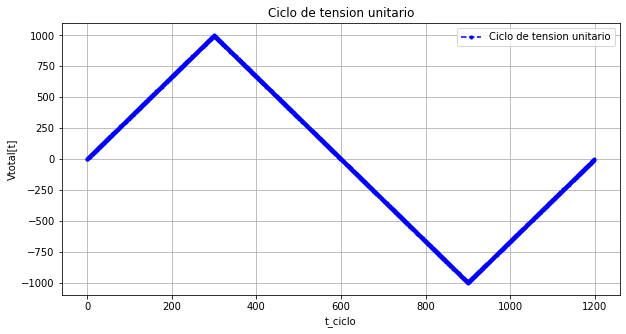

In [5]:
plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(t_ciclo_unitario, V_unitario, '.', linestyle='dashed', label='Ciclo de tension unitario', color='blue')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Vtotal[t]')
plt.title('Ciclo de tension unitario')
plt.grid(True)
plt.show()

In [6]:
#Ciclo de tension del experimento --> puede contener varios ciclos de tension unitarios
t_ciclo = list(range(0,tau))
V_total = list(range(0,0))

#if n_ciclos>1:
cont_ciclos=list(range(0,n_ciclos))
for k in cont_ciclos:
    V_total=V_total+V_unitario

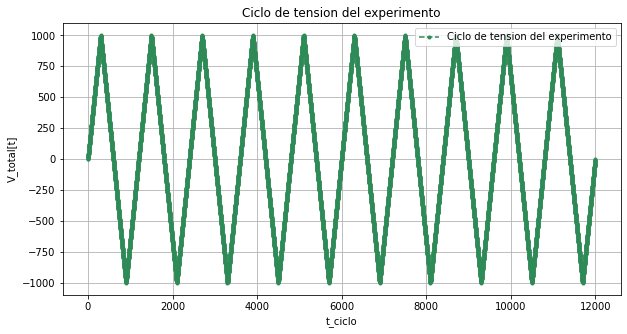

In [7]:
plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(t_ciclo, V_total, '.', linestyle='dashed', label='Ciclo de tension del experimento', color='seagreen')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('V_total[t]')
plt.title('Ciclo de tension del experimento')
plt.grid(True)
plt.show()

### Movilidad de los contactos
***
Se definen los parametros de movilidad para cada sitio "n". Se usan mas adelante en el calculo de probabilidades de transicion de vacancias.

In [8]:
vb= list(range(0,N))            #Listado - movilidad de cada sitio i

for i in n:
    if i <= NL:
        vb[i]=VBAL
    elif i >=len(n)-NR:   #obtengo long de la lista n
        vb[i]=VBAR
    else:
        vb[i]=VBB

In [9]:
'''plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(n, vb, '.', linestyle='dashed', label='Movilidad de los contactos', color='#800000')
plt.legend()
plt.xlabel('n (Bines)')
plt.ylabel('Vb[n]')
plt.title('Movilidad de los contactos')
plt.grid(True)'''

"plt.rc('figure', figsize=(10, 5))\nplt.rc('axes', labelsize=10)\nplt.rc('xtick', labelsize=10)\nplt.rc('ytick', labelsize=10)\nplt.rc('legend', fontsize=10)\nplt.plot(n, vb, '.', linestyle='dashed', label='Movilidad de los contactos', color='#800000')\nplt.legend()\nplt.xlabel('n (Bines)')\nplt.ylabel('Vb[n]')\nplt.title('Movilidad de los contactos')\nplt.grid(True)"

### Densidad de vacancias inicial
***
La densidad de vacancias iniciales se setean en 10E-4  
La densidad de vacancias total sera la sumatoria de todas las vacancias locales

In [10]:
#Densidad de vacancias inicial --> 10E-4 Rozemberg
di= list(range(0,N)) 
fdid=1                   #Factor de densidad inicial de vacancias extremo derecho
fdii=1                  #Factor de densidad inicial de vacancias extremo izquierdo

for i in n:
    if i <= NL:
        di[i]=d_inicial*fdii
    elif i >=len(n)-NR:   #obtengo long de la lista n
        di[i]=d_inicial*fdid
    else:
        di[i]=d_inicial
        
#Densidad de vacancias total
dtot=0
for i in n:
    dtot=+di[i]

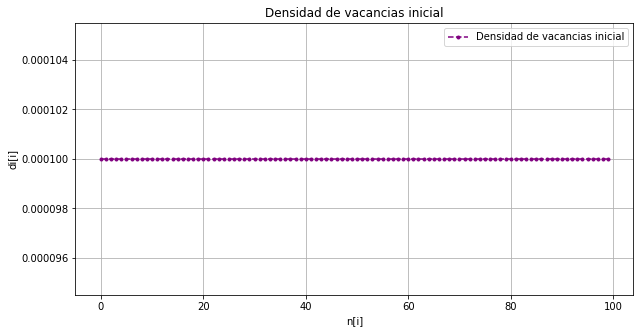

In [11]:
#print("La densidad total de vacancias es")
#print(dtot)
#print(di)

plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(n, di, '.', linestyle='dashed', label='Densidad de vacancias inicial', color='purple')
plt.legend()
plt.xlabel('n[i]')
plt.ylabel('di[i]')
plt.title('Densidad de vacancias inicial')
plt.grid(True)

### Resistividad local
***
Se determinan los parametros para calcular las resistividades locales y posteriormente la resistividad total (sumatoria de las resistividades locales)  
* *Fact* son constantes en cada sector de la muestra  
* La resistividad de cada sitio se define como:  
                R(i) = A(i) * di(i)

In [12]:
rho= list(range(0,N))         #Variable de resistividad local

rho_total= list(range(0,tau))    #Resistencia total
#rho_izq  = list(range(0,tau))   #Resistencia izquierda
#rho_der  = list(range(0,tau))   #Resistencia derecha

### Definicion de otras variables
***


In [13]:
i_total= list(range(0,tau))

delta = list(range(0,N))
piip1 = list(range(0,N))
pip1i = list(range(0,N))
piim1 = list(range(0,N))
pim1i = list(range(0,N))
deltap= list(range(0,N))
deltam= list(range(0,N))

dtot = list(range(0,tau))

Matrizd = [[0 for col in range(N)] for row in range(tau)]
Matrizdn= [[0 for col in range(N)] for row in range(tau)]

In [14]:
#Mediante la libreria datetime registramos el tiempo del sistema para cada corrida
t_sistema = list(range(0,tau))

In [15]:
#Influencia de la temperatura
T= 273
C1=0.00366300366300366

## Cuerpo del codigo
***

In [16]:
for t in t_ciclo:
    rho_total[t]=0
    t_sistema[t]=datetime.datetime.now()

    #Registramos en una matriz la distribucion de densidad de vacancias en cada tiempo t del experimento
    for i in n:
        Matrizd[t][i] = di[i]
        Matrizdn[t][i] = di[i]/d_inicial
    #Calculamos densidad de vacancias totales en cada tiempo t del experimento
    dtot[t]=0
    for i in n:
        dtot[t]=dtot[t]+di[i]

    #Calculamos resistencias locales
    for i in n:
        if i < NL:
            rho[i]=(AL*di[i])

        elif i >=len(n)-NR:
            rho[i]=(AR*di[i])

        else:
            rho[i]=(AB*di[i])

    #Resistencias totales
    for i in n:
        rho_total[t]= rho_total[t]  + rho[i]

    #Corriente total
    i_total[t]= V_total[t]/rho_total[t] 

    #Calculo de las probabilidades de transicion entre sitios   im1 <-> i <-> ip1 
    for i in n:
        delta[i]=0

    for i in n:
        #Condiciones de borde extremo derecho
        if (i==(N-1)):
            piip1[i]= 0
            pip1i[i]= 0
            piim1[i]= di[i]  *(1-di[i-1]) *np.exp(-vb[i]/(T*C1)  -i_total[t]* rho[i]/2  )
            pim1i[i]= di[i-1]*(1-di[i])   *np.exp(-vb[i-1]/(T*C1) +i_total[t]* rho[i-1]/2)

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i])
            else:
                deltap[i]=-min(-deltap[i],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i],1-di[i-1])
            else:
                deltam[i]=-min(-deltam[i],di[i-1],1-di[i])

            delta[i]=deltap[i]+deltam[i]

        #Condiciones de borde extremo izquierdo
        elif (i==0):
            piip1[i]= di[i]  *(1-di[i+1]) *np.exp(-vb[i]/(T*C1)   +i_total[t]* rho[i]/2  )
            pip1i[i]= di[i+1]*(1-di[i])   *np.exp(-vb[i+1]/(T*C1) -i_total[t]* rho[i+1]/2)
            piim1[i]= 0
            pim1i[i]= 0

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i],1-di[i+1])
            else:
                deltap[i]=-min(-deltap[i],di[i+1],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i])
            else:
                deltam[i]=-min(-deltam[i],1-di[i])

            delta[i]=deltap[i]+deltam[i]

        #Calculo en el bulk
        else:
            piip1[i]= di[i]  *(1-di[i+1]) *np.exp(-vb[i]/(T*C1)   +i_total[t]* rho[i]/2  )
            pip1i[i]= di[i+1]*(1-di[i])   *np.exp(-vb[i+1]/(T*C1) -i_total[t]* rho[i+1]/2)
            piim1[i]= di[i]  *(1-di[i-1]) *np.exp(-vb[i]/(T*C1)   -i_total[t]* rho[i]/2  )
            pim1i[i]= di[i-1]*(1-di[i])   *np.exp(-vb[i-1]/(T*C1) +i_total[t]* rho[i-1]/2)

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i],1-di[i+1])
            else:
                deltap[i]=-min(-deltap[i],di[i+1],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i],1-di[i-1])
            else:
                deltam[i]=-min(-deltam[i],di[i-1],1-di[i])

            delta[i]=deltap[i]+deltam[i]

    #Se actualiza la densidad local de vacancias di(i)
    for i in n:
        di[i]=di[i]-delta[i]
    #di[0]=d_inicial            #Reservorio de vacancias (densidad cte) en el lado izquierdo
    #di[N-1]=d_inicial           #Reservorio de vacancias (densidad cte) en el lado derecho
    
        

### Exportamos las variables 
Exportamos los resultados a formato .CSV usando la libreria Pandas
***

In [17]:
columns = {}
columns['t_ciclo'] = t_ciclo
columns['V_total'] = V_total
columns['rho_total'] = rho_total
columns['i_total'] = i_total
columns['t_sistema'] = t_sistema

data = list(zip(columns['t_ciclo'],columns['V_total'],columns['rho_total'],columns['i_total'],columns['t_sistema']))
df = pd.DataFrame(data = data)
df.to_csv('00_CSV_Datos.csv',decimal=',', sep= ";", index=False, header=["t_ciclo", "V_total","rho_total", "i_total", "t_sistema"])

In [18]:
df = pd.DataFrame(Matrizd)
df.to_csv('00_CSV_Densidades.csv',decimal=',', sep= ";", index=False, header=False)

In [19]:
#Calculamos el tiempo total del experimento
t_sistema[t]=datetime.datetime.now()
Tiempo_total=t_sistema[t]-t_sistema[0]
print(Tiempo_total)

0:00:39.777712


## Grafico de los resultados
***

### Perfil de concentracion de vacancias

  
Densidad total de vacancias del ciclo Nciclo:
0.009999999999999983
  
Resistencia total del ciclo Nciclo:
2.0079999956969177


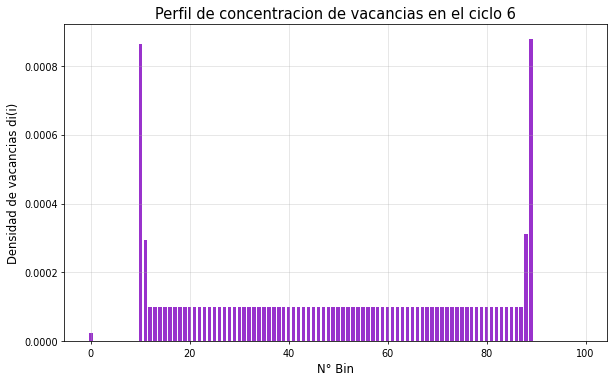

In [20]:
#Numero de ciclo al que le voy a graficar el perfil de concentracion de vacancias:
Nciclo=6     #NOTA: PROBAR CON tstep 20000 y vas a ver como se vacian de vacancias los extremos

print("  ")
print("Densidad total de vacancias del ciclo Nciclo:")
print(dtot[t])
print("  ")
print("Resistencia total del ciclo Nciclo:")
print(rho_total[Nciclo])

plt.figure(figsize=(10, 6), dpi=70)
plt.bar(range(len(Matrizd[Nciclo*s])), (Matrizd[Nciclo*s]) , width=0.7,color='#9932CC')
plt.grid(alpha=0.3,linestyle='-',linewidth=1)
title='Perfil de concentracion de vacancias en el ciclo'+" "+ str(Nciclo)
plt.title(title, fontsize=15)
plt.xlabel('N° Bin', fontsize=12)
plt.ylabel('Densidad de vacancias di(i)', fontsize=12)
plt.show()

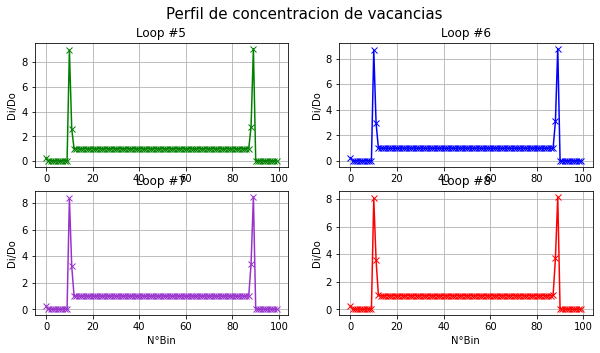

In [21]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(range(len(Matrizdn[5*s])), (Matrizdn[5*s]), 'x', linestyle='solid', label='Loop #5', color='green')
axis[0, 0].set_title('Loop #5')
axis[0, 0].grid()
axis[0, 0].set_ylabel('Di/Do')

axis[0, 1].plot(range(len(Matrizdn[6*s])), (Matrizdn[6*s]), 'x', linestyle='solid', label='Loop #6', color='blue')
axis[0, 1].set_title('Loop #6')
axis[0, 1].grid()
axis[0, 1].set_ylabel('Di/Do')

axis[1, 0].plot(range(len(Matrizdn[7*s])), (Matrizdn[7*s]), 'x', linestyle='solid', label='Loop #7', color='#9932CC')
axis[1, 0].set_title('Loop #7')
axis[1, 0].grid()
axis[1, 0].set_xlabel('N°Bin')
axis[1, 0].set_ylabel('Di/Do')

axis[1, 1].plot(range(len(Matrizdn[8*s])), (Matrizdn[8*s]), 'x', linestyle='solid', label="Bar 1",color='red')
axis[1, 1].set_title('Loop #8')
axis[1, 1].grid()
axis[1, 1].set_xlabel('N°Bin')
axis[1, 1].set_ylabel('Di/Do')

#plt.legend()
#plt.xlabel('N° Bin')
#plt.ylabel('Di / Do')
#plt.title('Perfil de concentracion de vacancias', fontsize=15)
#fig.suptitle('Main title')
plt.suptitle('Perfil de concentracion de vacancias', fontsize=15)
plt.savefig("Di_Do")
plt.show()

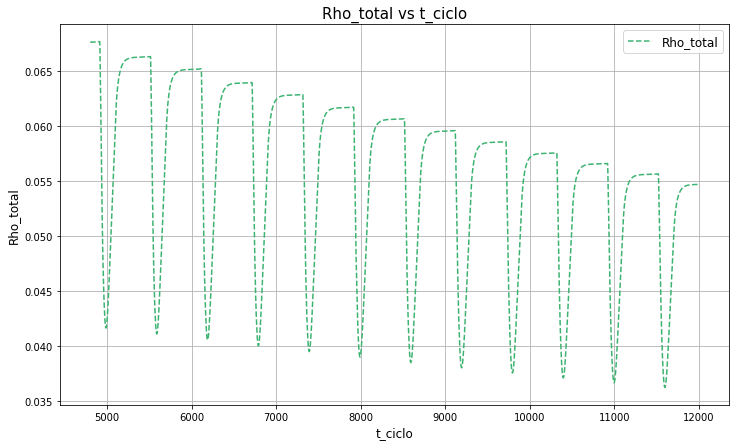

In [22]:
#Resistencia vs Numero de ciclo, luego de la etapa inicial (forming)

plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(t_ciclo[4*s+1:], rho_total[4*s+1:], linestyle='dashed', label='Rho_total', color='mediumseagreen')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Rho_total')
plt.title('Rho_total vs t_ciclo', fontsize=15)
plt.savefig("R_vs_t.png")
plt.show()

El cociente de Rmax/Rmin se va reduciendo con el numero de ciclos

0.010000000000000009
0.009999999999999978


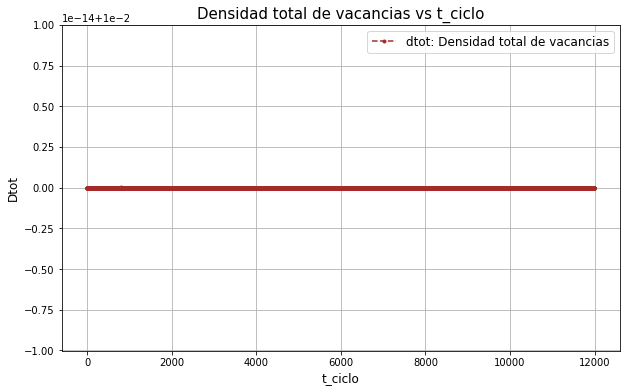

In [23]:
# Se puede ver que la densidad total de vacancias se mantiene constante a lo largo del experimento --> no hay fuga de vacancias

print(max(dtot))
print(min(dtot))

plt.rc('figure', figsize=(10, 6))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(t_ciclo, dtot,'.', linestyle='dashed', label='dtot: Densidad total de vacancias', color='brown')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Dtot')
plt.title('Densidad total de vacancias vs t_ciclo', fontsize=15)
plt.show()

### Rho total vs V normalizada
***

In [24]:
#Grafico de resistencia total vs V_normalizada luego del forming
#en este caso graficamos a partir del 5to ciclo

V_normalizada= list(range(0,tau))
for t in t_ciclo:
    V_normalizada[t]= V_total[t]/Vmax

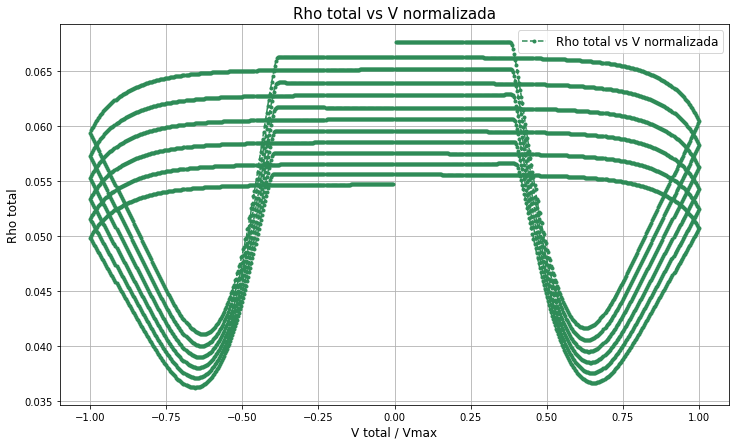

In [25]:
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(V_normalizada[4*s+1:], rho_total[4*s+1:], '.', linestyle='dashed', label='Rho total vs V normalizada', color='seagreen')
plt.legend()
plt.xlabel('V total / Vmax')
plt.ylabel('Rho total')
plt.title('Rho total vs V normalizada', fontsize=15)
plt.savefig("R_vs_V.png")
plt.show()

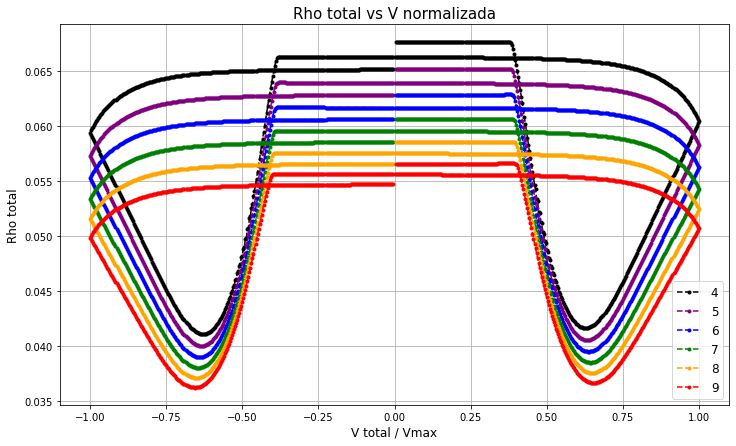

In [26]:
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(V_normalizada[4*s+1:5*s], rho_total[4*s+1:5*s], '.', linestyle='dashed', label='4', color='black')
plt.plot(V_normalizada[5*s+1:6*s], rho_total[5*s+1:6*s], '.', linestyle='dashed', label='5', color='purple')
plt.plot(V_normalizada[6*s+1:7*s], rho_total[6*s+1:7*s], '.', linestyle='dashed', label='6', color='blue')
plt.plot(V_normalizada[7*s+1:8*s], rho_total[7*s+1:8*s], '.', linestyle='dashed', label='7', color='green')
plt.plot(V_normalizada[8*s+1:9*s], rho_total[8*s+1:9*s], '.', linestyle='dashed', label='8', color='orange')
plt.plot(V_normalizada[9*s+1:],    rho_total[9*s+1:],    '.', linestyle='dashed', label='9', color='red')
plt.legend()
plt.xlabel('V total / Vmax')
plt.ylabel('Rho total')
plt.title('Rho total vs V normalizada', fontsize=15)
plt.savefig("R_vs_V_ciclos.png")
plt.show()

### Rho total vs I normalizada
***

In [27]:
#Grafico de resistencia total vs I_normalizada luego del forming
#Graficamos a partir del 5to ciclo
#Normalizamos la corriente tomando el maximo valor en modulo

imax=max(i_total)
imin=min(i_total)
imax2=max(imax, -imin)

i_normalizada= list(range(0,tau))
for t in t_ciclo:
    i_normalizada[t]= i_total[t]/imax2

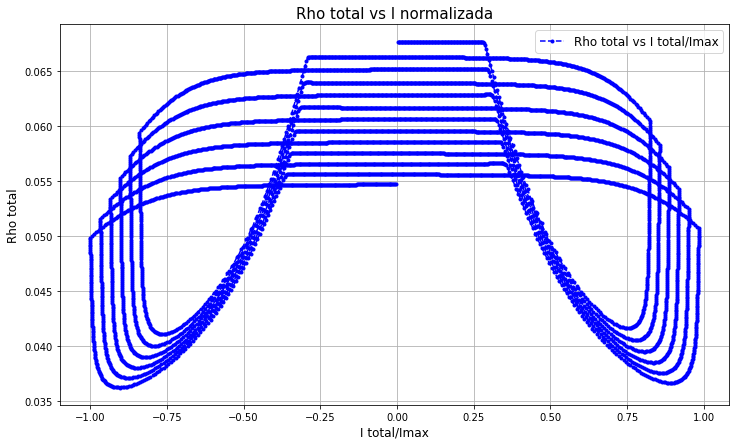

In [28]:
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(i_normalizada[4*s+1:], rho_total[4*s+1:], '.', linestyle='dashed', label='Rho total vs I total/Imax', color='blue')
plt.legend()
plt.xlabel('I total/Imax')
plt.ylabel('Rho total')
plt.title('Rho total vs I normalizada', fontsize=15)
plt.savefig("R_vs_I.png")
plt.show()

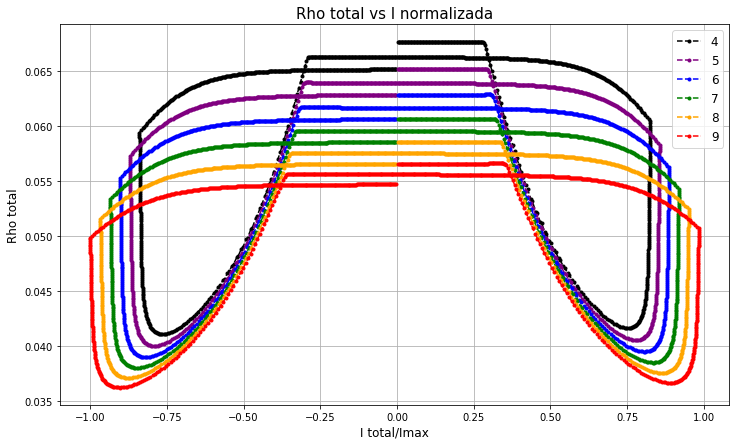

In [29]:
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(i_normalizada[4*s+1:5*s], rho_total[4*s+1:5*s], '.', linestyle='dashed', label='4', color='black')
plt.plot(i_normalizada[5*s+1:6*s], rho_total[5*s+1:6*s], '.', linestyle='dashed', label='5', color='purple')
plt.plot(i_normalizada[6*s+1:7*s], rho_total[6*s+1:7*s], '.', linestyle='dashed', label='6', color='blue')
plt.plot(i_normalizada[7*s+1:8*s], rho_total[7*s+1:8*s], '.', linestyle='dashed', label='7', color='green')
plt.plot(i_normalizada[8*s+1:9*s], rho_total[8*s+1:9*s], '.', linestyle='dashed', label='8', color='orange')
plt.plot(i_normalizada[9*s+1:],    rho_total[9*s+1:],    '.', linestyle='dashed', label='9', color='red')
plt.legend()
plt.xlabel('I total/Imax')
plt.ylabel('Rho total')
plt.title('Rho total vs I normalizada', fontsize=15)
plt.savefig("R_vs_I_ciclos.png")
plt.show()

### V normalizada vs I normalizada
***

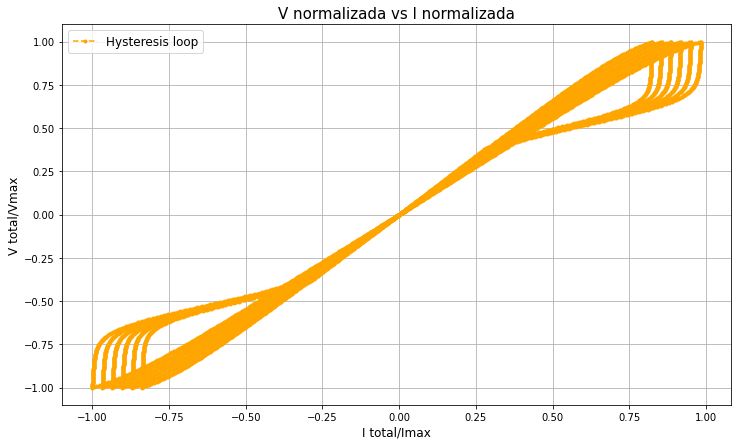

In [30]:
#Grafico de V normalizado vs I_normalizada luego del forming
#Graficamos a partir del 5to ciclo

plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(i_normalizada[4*s:], V_normalizada[4*s:], '.', linestyle='dashed', label='Hysteresis loop', color='orange')
plt.legend()
plt.xlabel('I total/Imax')
plt.ylabel('V total/Vmax')
plt.title('V normalizada vs I normalizada', fontsize=15)
plt.savefig("V_vs_I.png")
plt.show()